In [15]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('./described_dataset_label.csv',sep='\t',encoding='utf-8')
data = data.rename(columns={'FILE':'image','AUTHOR':'author', 'TECHNIQUE':'style','URL':'description'})
data = data[['image','author','style','description']]
data['author'] = [x.split(',')[0].lower() for x in data['author']]
data['style'] = [x.split(',')[0].lower() for x in data['style']]

In [17]:
data.head()

,image,author,style,description
0,./images/1.jpg,aachen,oil on copper,"The painting, displaying the characteristic Ma..."
1,./images/2.jpg,aachen,oil on canvas,The representation of this group is related to...
2,./images/3.jpg,aachen,copperplate,At the end of the 16th century the court of Em...
3,./images/4.jpg,aachen,oil on canvas,Rudolf II (1552-1612) was the son of the Holy ...
4,./images/5.jpg,aachen,oil on canvas,Hans von Aachen was an artist who fully embrac...


In [18]:
print("Basic Statistics:")
print(data.describe())

Basic Statistics:
                 image                   author          style  \
count            31255                    31255          31255   
unique           31255                     3805           1696   
top     ./images/1.jpg  michelangelo buonarroti  oil on canvas   
freq                 1                      529          10483   

                                              description  
count                                               31255  
unique                                              29357  
top     The picture shows the fresco before the restor...  
freq                                                   39  


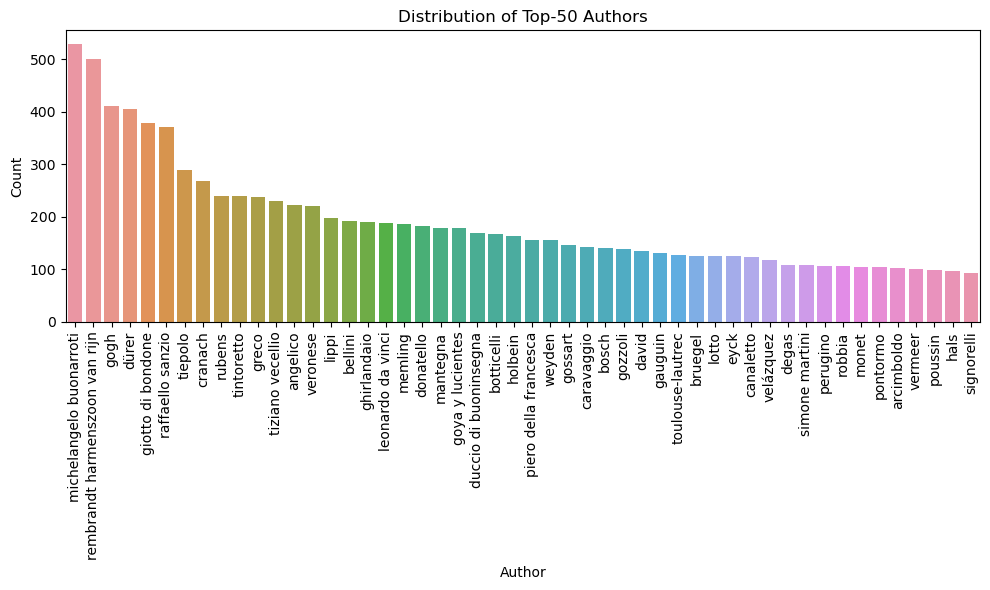

In [19]:
# Distribution of authors
plt.figure(figsize=(10, 6))
sns.countplot(x='author', data=data, order=data['author'].value_counts().head(50).index)
plt.xticks(rotation=90)
plt.title("Distribution of Top-50 Authors")
plt.xlabel("Author")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

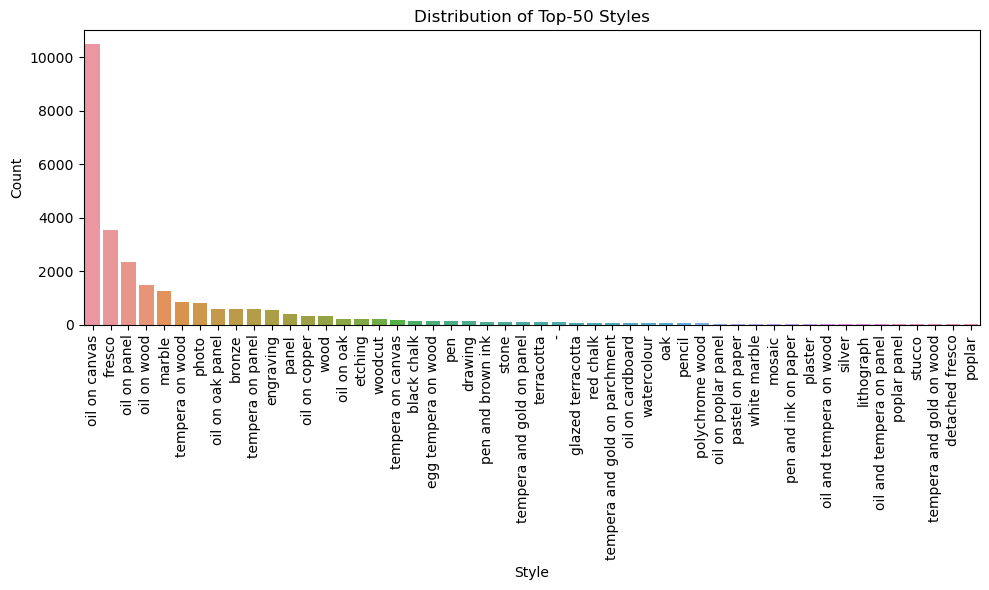

In [20]:
# Distribution of authors
plt.figure(figsize=(10, 6))
sns.countplot(x='style', data=data, order=data['style'].value_counts().head(50).index)
plt.xticks(rotation=90)
plt.title("Distribution of Top-50 Styles")
plt.xlabel("Style")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

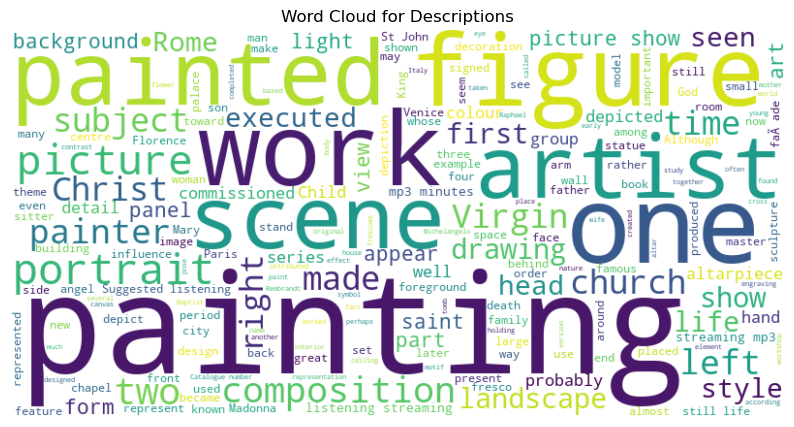

In [7]:
# Word cloud for descriptions
from wordcloud import WordCloud

text = ' '.join(data['description'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Descriptions")
plt.show()